In [ ]:
# all_point = [(1,1),
#              (2,1),
#              (4,3),
#              (5,4)]

# init_center = [(1,1), 
#                (2,1)]

In [ ]:
from IPython.display import Markdown, display
def printmd(string):
    display(Markdown(string))

from IPython.display import Javascript
display(Javascript('''google.colab.output.setIframeHeight(0, true, {maxHeight: 10000})'''))

import pandas as pd
import math

# Change all ppint, center point, k and metric 
all_point = [(1,1),
             (1.5,2),
             (3,4),
             (5,7),
             (3.5,5),
             (4.5,5),
             (3.5,4.5)]

init_center = [(1,1),
             (1.5,2)]

# len(init_center)
k = 2

# choose 
# Euclidean 
# Manhattan
metric = "Euclidean"

# Do not change in the after
count_interation = 100
new_center_list = []
all_new_center = dict()

for interation_i in range(1, count_interation):
  printmd("##Interation " + str(interation_i) + ": \n")
  dist_matrix = pd.DataFrame()
  if len(new_center_list) > 0:
    init_center = new_center_list
  count = 0
  for center_tuple in init_center:
    count = count + 1
    column_name = "mean " + str(count)
    dist_list = []
    for all_tuple in all_point:
      if metric == "Euclidean":
        # sqrt (x2−x1)^2 + (y2−y1)^2 
        euclidean_dist = math.sqrt(math.pow(center_tuple[0] - all_tuple[0],2) + math.pow(center_tuple[1] - all_tuple[1],2))
        dist_list.append(round(euclidean_dist, 2))
        # dist_list.append(math.sqrt((center_tuple[0] - all_tuple[0])**2 + (center_tuple[1] - all_tuple[1])**2))
      elif metric == "Manhattan":
        # |x2−x1| + |y2−y1| 
        manhattan_dist = abs(center_tuple[0] - all_tuple[0]) + abs(center_tuple[1] - all_tuple[1])
        dist_list.append(round(manhattan_dist, 2))
    dist_matrix[column_name] = dist_list
  display(dist_matrix)
  print("\n")
  
  dist_matrix['shortest_dist'] = dist_matrix[list(dist_matrix.columns)].min(axis=1)
  dist_matrix
  # for dist in dist_matrix[dist_matrix.columns[dist_matrix.shape[1] - 1]]:
  #   print(dist)
  cluster_list = []
  for index, row in dist_matrix.iterrows():
      # all column before shortest_dist 
      for i in range(dist_matrix.shape[1] - 1):
        if row['shortest_dist'] == row[i]:
          cluster_list.append(i + 1)
  dist_matrix["Cluster"] = cluster_list
  dist_matrix = dist_matrix.drop('shortest_dist', 1)
  display(dist_matrix)
  print("\n")
  
  cluster_dict = dict()
  for i in range(k):
    cluster_name = "cluster_" + str(i + 1)
    cluster_point_list = []
    for index, row in dist_matrix.iterrows():
      if row['Cluster'] == i + 1:
        cluster_point_list.append(all_point[index])
    cluster_dict[cluster_name] = cluster_point_list
  for key, value in cluster_dict.items():
    printmd("**" + str(key) + "**" + ": " + str(value))
  print("\n")
  
  new_center_list = []
  for i in range(k):
    total_x = 0
    total_y = 0
    cluster_name = "cluster_" + str(i + 1)
    for cluster_tuple in cluster_dict[cluster_name]:
      total_x = total_x + cluster_tuple[0]
      total_y = total_y + cluster_tuple[1]
    avg_x = round(total_x / len(cluster_dict[cluster_name]), 2)
    avg_y = round(total_y / len(cluster_dict[cluster_name]), 2)
    new_cluster_center = ()
    new_cluster_center = (avg_x, avg_y)
    new_center_list.append(new_cluster_center)
  printmd("**The new center**: " + str(new_center_list))
  print("\n")

  new_center_dict_name = "interation_" + str(interation_i) + "_new_center"
  all_new_center[new_center_dict_name] = new_center_list
  if len(all_new_center) > 1:
    prev_new_center_dict_name = "interation_" + str(interation_i - 1) + "_new_center"
    if all_new_center[new_center_dict_name] == all_new_center[prev_new_center_dict_name]:
      printmd("**Comparing iteration " + str(interation_i) + " with iteration " + str(interation_i - 1) + ", the means do not change.**")
      printmd("**So after " + "iteration " + str(interation_i - 1) + ", k mean clustering is stable.**")
      printmd("**So the grouping is**: ")
      for i in range(k):
        cluster_name = "cluster_" + str(i + 1)
        printmd(str(cluster_dict[cluster_name]) + " **are in group " + str(i + 1) + "**")
      break
  print("\n")
  print("\n")



<IPython.core.display.Javascript object>

##Interation 1: 


mean 1  mean 2
0    0.00    1.12
1    1.12    0.00
2    3.61    2.50
3    7.21    6.10
4    4.72    3.61
5    5.32    4.24
6    4.30    3.20



   mean 1  mean 2  shortest_dist
0    0.00    1.12           0.00
1    1.12    0.00           0.00
2    3.61    2.50           2.50
3    7.21    6.10           6.10
4    4.72    3.61           3.61
5    5.32    4.24           4.24
6    4.30    3.20           3.20


mean 1  mean 2  Cluster
0    0.00    1.12        1
1    1.12    0.00        2
2    3.61    2.50        2
3    7.21    6.10        2
4    4.72    3.61        2
5    5.32    4.24        2
6    4.30    3.20        2

**cluster_1**: [(1, 1)]

**cluster_2**: [(1.5, 2), (3, 4), (5, 7), (3.5, 5), (4.5, 5), (3.5, 4.5)]

**The new center**: [(1.0, 1.0), (3.5, 4.58)]

##Interation 2: 


mean 1  mean 2
0    0.00    4.37
1    1.12    3.26
2    3.61    0.77
3    7.21    2.85
4    4.72    0.42
5    5.32    1.08
6    4.30    0.08



   mean 1  mean 2  shortest_dist
0    0.00    4.37           0.00
1    1.12    3.26           1.12
2    3.61    0.77           0.77
3    7.21    2.85           2.85
4    4.72    0.42           0.42
5    5.32    1.08           1.08
6    4.30    0.08           0.08


mean 1  mean 2  Cluster
0    0.00    4.37        1
1    1.12    3.26        1
2    3.61    0.77        2
3    7.21    2.85        2
4    4.72    0.42        2
5    5.32    1.08        2
6    4.30    0.08        2

**cluster_1**: [(1, 1), (1.5, 2)]

**cluster_2**: [(3, 4), (5, 7), (3.5, 5), (4.5, 5), (3.5, 4.5)]

**The new center**: [(1.25, 1.5), (3.9, 5.1)]

##Interation 3: 


mean 1  mean 2
0    0.56    5.02
1    0.56    3.92
2    3.05    1.42
3    6.66    2.20
4    4.16    0.41
5    4.78    0.61
6    3.75    0.72



   mean 1  mean 2  shortest_dist
0    0.56    5.02           0.56
1    0.56    3.92           0.56
2    3.05    1.42           1.42
3    6.66    2.20           2.20
4    4.16    0.41           0.41
5    4.78    0.61           0.61
6    3.75    0.72           0.72


mean 1  mean 2  Cluster
0    0.56    5.02        1
1    0.56    3.92        1
2    3.05    1.42        2
3    6.66    2.20        2
4    4.16    0.41        2
5    4.78    0.61        2
6    3.75    0.72        2

**cluster_1**: [(1, 1), (1.5, 2)]

**cluster_2**: [(3, 4), (5, 7), (3.5, 5), (4.5, 5), (3.5, 4.5)]

**The new center**: [(1.25, 1.5), (3.9, 5.1)]

**Comparing iteration 3 with iteration 2, the means do not change.**

**So after iteration 2, k mean clustering is stable.**

**So the grouping is**: 

[(1, 1), (1.5, 2)] **are in group 1**

[(3, 4), (5, 7), (3.5, 5), (4.5, 5), (3.5, 4.5)] **are in group 2**

[[3.9  5.1 ]
 [1.25 1.5 ]]


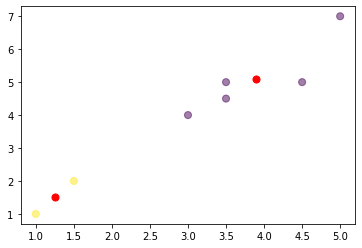

In [ ]:
# https://datatofish.com/k-means-clustering-python/ 
from pandas import DataFrame
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

Data = {'x': [],'y': []}

for point_tuple in all_point:
  Data["x"].append(point_tuple[0])

for point_tuple in all_point:
  Data["y"].append(point_tuple[1])
  
df = DataFrame(Data,columns=['x','y'])
  
kmeans = KMeans(n_clusters=k).fit(df)
centroids = kmeans.cluster_centers_
print(centroids)

plt.scatter(df['x'], df['y'], c= kmeans.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)
plt.show()